# ASSET BACKED SECURITIES - AUTO FINANCE LOANS

SEC data ingested from Edgar Online

In [1]:
import re
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, LSTM, GRU
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
tf.__version__
%matplotlib inline

import seaborn as sns
import operator
import collections
from scipy.io import mmread, mmwrite
from random import randint
from sklearn import linear_model
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing as pp
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import NMF
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
import scipy.stats as stats
from sklearn import tree
from sklearn.feature_selection import f_regression
from sklearn.gaussian_process import GaussianProcess


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler





Using TensorFlow backend.
C:\Progra~1\Anaconda3_4\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Progra~1\Anaconda3_4\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Model Name

In [2]:
name = "ABS_Keras-GRU254GRU128D32D2-adam{}".format(int(time.time()))
#name_noTime = "ABS_Keras-LSTM128LSTM128D32D2-adam"

# Choose default parameters

In [3]:
#parameters to choose

default_days = 0
nrows = 100000
train_split = 0.80
model_type = keras
path = 'c:/users/ugy1/abs/'
rows_for_prediction = 1000
cutOffForOriginationDate='2012-01-01'
manualOversamplingFactor=0.0
epochs=1

In [4]:
# columns to be used
use_list=[
    'abs_loan.cik',
 #'abs_loan.accessionnumber',
 #'abs_loan.assettypenumber',
 'abs_loan.assetnumber',
 'abs_loan.reportingperiodbeginningdate',
 'abs_loan.reportingperiodendingdate',
 'abs_loan.originatorname',
 'abs_loan.originationdate',
 'abs_loan.originalloanamount',
 'abs_loan.originalloanterm',
 'abs_loan.loanmaturitydate',
 'abs_loan.originalinterestratepercentage',
 #'interestcalculationtypecode',
 #'originalinterestratetypecode',
 #'originalinterestonlytermnumber',
 'abs_loan.originalfirstpaymentdate',
 'abs_loan.underwritingindicator',
 'abs_loan.graceperiodnumber',
 #'paymenttypecode',
 'abs_loan.subvented',
 #'vehiclemanufacturername',
 #'vehiclemodelname',
 'abs_loan.vehiclenewusedcode',
 #'vehiclemodelyear',
 'abs_loan.vehicletypecode',
 #'vehiclevalueamount',
 #'vehiclevaluesourcecode',
 'abs_loan.obligorcreditscoretype',
 'abs_loan.obligorcreditscore',
 'abs_loan.obligorincomeverificationlevelcode',
 'abs_loan.obligoremploymentverificationcode',
 'abs_loan.coobligorindicator',
 'abs_loan.paymenttoincomepercentage',
 #'obligorgeographiclocation',
 'abs_loan.assetaddedindicator',
 #'remainingtermtomaturitynumber',
 'abs_loan.reportingperiodmodificationindicator',
 'abs_loan.servicingadvancemethodcode',
 'abs_loan.reportingperiodbeginningloanbalanceamount',
 'abs_loan.nextreportingperiodpaymentamountdue',
 'abs_loan.reportingperiodinterestratepercentage',
 'abs_loan.nextinterestratepercentage',
 'abs_loan.servicingfeepercentage',
 'abs_loan.servicingflatfeeamount',
 'abs_loan.otherservicerfeeretainedbyservicer',
 'abs_loan.otherassesseduncollectedservicerfeeamount',
 'abs_loan.scheduledinterestamount',
 'abs_loan.scheduledprincipalamount',
 'abs_loan.otherprincipaladjustmentamount',
 'abs_loan.reportingperiodactualendbalanceamount',
 'abs_loan.reportingperiodscheduledpaymentamount',
 'abs_loan.totalactualamountpaid',
 'abs_loan.actualinterestcollectedamount',
 'abs_loan.actualprincipalcollectedamount',
 'abs_loan.actualothercollectedamount',
 'abs_loan.serviceradvancedamount',
 'abs_loan.interestpaidthroughdate',
 'abs_loan.zerobalanceeffectivedate',
 'abs_loan.zerobalancecode',
 'abs_loan.currentdelinquencystatus',
 #'primaryloanservicername',
 #'mostrecentservicingtransferreceiveddate',
 #'assetsubjectdemandindicator',
 #'assetsubjectdemandstatuscode',
 #'repurchaseamount',
 #'demandresolutiondate',
 #'repurchasername',
 #'repurchasereplacementreasoncode',
 #'chargedoffprincipalamount',
 #'recoveredamount',
 #'modificationtypecode',
 #'paymentextendednumber',
 #'repossessedindicator',
 #'repossessedproceedsamount'
]

In [5]:
#df.drop(drop_list,axis=1, inplace=True)

# GPU Options

In [6]:
#set gpu options to adjust gpu usage
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.5)
# sess=tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# Load data

In [7]:
#load data from tab delimited file
df=pd.read_csv(path+'datasets/abs_loan.csv', 
               usecols=use_list, 
               sep='\t',
               #compression=bz2,
               #nrows=nrows,
               low_memory=False, 
              #index_col='abs_loan.reportingperiodendingdate', 
               parse_dates=True
              )

#remove 'abs_loan.' string from columns because 'dot' is a command in pandas
df.columns=df.columns.str.replace('abs_loan.','')

#display data shape
print(df.shape)
#view first five rows of all columns
#df.head(n=5)

(31511678, 47)


In [8]:
#df.cik.unique()

In [9]:
#df.assetnumber.unique()

In [10]:
#df.loc[:,~df.columns.str.contains('^Unnamed')]

In [11]:
#df.duplicated(subset=['cik','assetnumber']).sum()

In [12]:
#df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate']).sum()

In [13]:
df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate','originationdate']).sum()

1197970

In [14]:
#df.loc[df.duplicated(subset=['cik','assetnumber','reportingperiodendingdate']),:]

In [15]:
df.duplicated().sum()

1197970

In [16]:
df.drop_duplicates(subset=['cik','assetnumber','reportingperiodendingdate','originationdate'],keep='last', inplace=True)

In [17]:
#df.columns.tolist()
df.shape

(30313708, 47)

In [18]:
#df.info(memory_usage='deep')

In [19]:
#df.memory_usage(deep=True).sum()

In [20]:
#df.dtypes

In [21]:
#df.head()
#df=df.sort_values(by='originationdate', ascending=True)

# Function to Draw Bar chart

In [22]:
#function to draw a bar chart 
def draw(data, title, ylabel, sort = False, n=-1):
    labels = pd.value_counts(data).head().index.tolist()
    count_classes = pd.value_counts(data, sort).head()
    count_classes.plot(kind = 'bar', rot=0)
    plt.xticks(range(len(labels)), labels)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print('Top ',n,' counts: ','\n',pd.value_counts(data, sort).head(n))

# Reporting Period

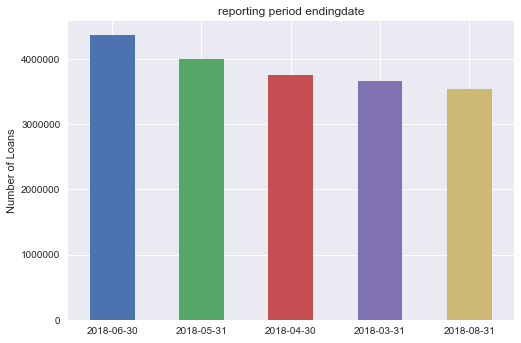

Top  100  counts:  
 2018-06-30    4362979
2018-05-31    3991000
2018-04-30    3755105
2018-03-31    3660354
2018-08-31    3540881
2018-02-28    3210528
2018-07-31    2620727
2017-12-31    2205186
2018-09-30    1602432
2017-01-31     449156
2017-02-28     407609
2016-12-31     282950
2017-11-30     102344
2017-03-31      75737
2018-01-31      46720
Name: reportingperiodendingdate, dtype: int64


In [23]:
draw(df.reportingperiodendingdate, title='reporting period endingdate', ylabel='Number of Loans', sort = True, n=100)

In [24]:
# restrict data to a reporting period
#df=df[df.index=='2017-11-30']

Mean current deliquency days for the reporting period

In [25]:
df.groupby(df.reportingperiodendingdate).currentdelinquencystatus.mean()

reportingperiodendingdate
2016-12-31     1.017230
2017-01-31     1.245357
2017-02-28     0.975419
2017-03-31     0.527338
2017-11-30     0.299060
2017-12-31     4.351060
2018-01-31     0.538368
2018-02-28     3.790537
2018-03-31     3.613464
2018-04-30     4.018169
2018-05-31     4.382200
2018-06-30     4.494235
2018-07-31     1.033303
2018-08-31     6.986425
2018-09-30    14.454640
Name: currentdelinquencystatus, dtype: float64

Mean ending balance for the reporting period

In [26]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean()

reportingperiodendingdate
2016-12-31    19307.627329
2017-01-31    18400.565060
2017-02-28    18864.512296
2017-03-31    18459.045384
2017-11-30    27365.950704
2017-12-31    16263.135838
2018-01-31    22312.621633
2018-02-28    16555.467863
2018-03-31    16243.891309
2018-04-30    16212.113389
2018-05-31    16070.462467
2018-06-30    16354.949164
2018-07-31    15704.642696
2018-08-31    16816.434780
2018-09-30    15810.045308
Name: reportingperiodactualendbalanceamount, dtype: float64

# Create Features for Reporting period

In [27]:
# create feature columns for categories within originator name 
def map_reportingperiodendingdate(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.reportingperiodendingdate).index.tolist()

for code in codes:
        df['reportingperiodending_{}'.format(code)] = list(map(map_reportingperiodendingdate, df.reportingperiodendingdate))
        print('Added Column for :   reportingperiodending_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   reportingperiodending_2018-06-30
Added Column for :   reportingperiodending_2018-05-31
Added Column for :   reportingperiodending_2018-04-30
Added Column for :   reportingperiodending_2018-03-31
Added Column for :   reportingperiodending_2018-08-31
Added Column for :   reportingperiodending_2018-02-28
Added Column for :   reportingperiodending_2018-07-31
Added Column for :   reportingperiodending_2017-12-31
Added Column for :   reportingperiodending_2018-09-30
Added Column for :   reportingperiodending_2017-01-31
Added Column for :   reportingperiodending_2017-02-28
Added Column for :   reportingperiodending_2016-12-31
Added Column for :   reportingperiodending_2017-11-30
Added Column for :   reportingperiodending_2017-03-31
Added Column for :   reportingperiodending_2018-01-31
New Dataframe shape :  (30313708, 62)


# Number of Days Loans Outstanding

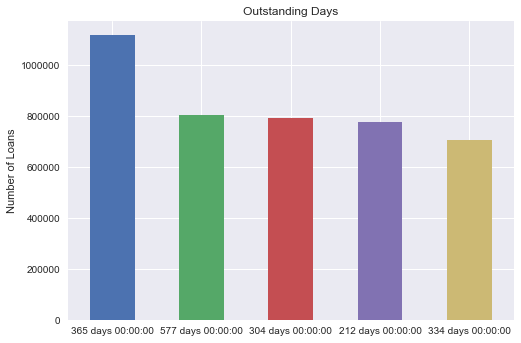

Top  5  counts:  
 365 days    1118783
577 days     803457
304 days     791994
212 days     776215
334 days     708415
Name: outstandingdays, dtype: int64


In [28]:
#calculate outstanding days
df['outstandingdays'] = pd.to_datetime(df['reportingperiodendingdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.outstandingdays, title='Outstanding Days', ylabel='Number of Loans', sort = True, n=5)
#remove days string for machine learning
df['outstandingdays']=df.outstandingdays.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
#df.outstandingdays.tail()

In [29]:
# retaining only loans with non-negative outstanding days
u=pd.value_counts(df.outstandingdays<0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.outstandingdays>0]   

No Loans Below zero outstanding days


In [30]:
# get statistics for outstanding days
df.outstandingdays.describe()

count    3.031276e+07
mean     6.224169e+02
std      5.106972e+02
min      0.000000e+00
25%      2.730000e+02
50%      4.850000e+02
75%      7.900000e+02
max      2.922000e+03
Name: outstandingdays, dtype: float64

Mean outstanding days for the reporting period

In [31]:
df.groupby(df.reportingperiodendingdate).outstandingdays.mean()

reportingperiodendingdate
2016-12-31    390.549889
2017-01-31    444.156462
2017-02-28    457.063465
2017-03-31     90.684276
2017-11-30    326.895070
2017-12-31    575.396975
2018-01-31    439.978275
2018-02-28    627.985054
2018-03-31    631.013987
2018-04-30    634.437935
2018-05-31    650.023500
2018-06-30    637.687212
2018-07-31    756.858757
2018-08-31    611.687875
2018-09-30    503.969048
Name: outstandingdays, dtype: float64

# Days Left until Maturity

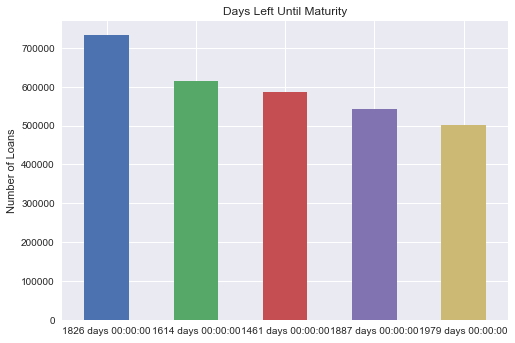

Top  5  counts:  
 1826 days    732887
1614 days    613622
1461 days    585966
1887 days    542220
1979 days    502089
Name: daystomaturity, dtype: int64


In [32]:
#calculate days left until maturity
df['daystomaturity'] = pd.to_datetime(df['loanmaturitydate'])-pd.to_datetime(df['reportingperiodendingdate'])
draw(df.daystomaturity, title='Days Left Until Maturity', ylabel='Number of Loans', sort=True, n=5)

In [33]:
# remove days from the data for machine learning
df['daystomaturity']=df.daystomaturity.map(lambda x: np.nan if pd.isnull(x) else x.days)
# print last five rows
df.daystomaturity.tail()

31511673    2130.0
31511674    2130.0
31511675    2130.0
31511676    1764.0
31511677    2130.0
Name: daystomaturity, dtype: float64

In [34]:
#retaining only loans with non-negative days to maturity
u=pd.value_counts(df.daystomaturity<=0)
if len(u)<2:
    print('No Loans Below zero outstanding days')
else: 
    print('Number of Loans with negative outstanding days :', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with only non-negative outstanding days')
    df=df[df.daystomaturity>0]

Number of Loans with negative outstanding days : 173094
Dropping  173094 rows and retaining loans with only non-negative outstanding days


In [35]:
#number of rows and columns of the dataframe
df.shape

(29567934, 64)

In [36]:
# statistics for days to maturity
df.daystomaturity.describe()

count    2.956793e+07
mean     1.430216e+03
std      5.471379e+02
min      2.800000e+01
25%      1.127000e+03
50%      1.553000e+03
75%      1.856000e+03
max      7.944000e+03
Name: daystomaturity, dtype: float64

Mean days to maturity for the reporting period

In [37]:
df.groupby(df.reportingperiodendingdate).daystomaturity.mean()

reportingperiodendingdate
2016-12-31    1630.752974
2017-01-31    1572.112689
2017-02-28    1534.587813
2017-03-31    1900.921452
2017-11-30    1601.029762
2017-12-31    1466.503750
2018-01-31    1674.368001
2018-02-28    1412.515209
2018-03-31    1413.236883
2018-04-30    1413.485323
2018-05-31    1400.122814
2018-06-30    1419.303252
2018-07-31    1262.163006
2018-08-31    1477.093127
2018-09-30    1614.013112
Name: daystomaturity, dtype: float64

In [38]:
df.drop(['loanmaturitydate'], axis=1, inplace=True)

# Origination date

# Removing loans before origination cutoff date

In [39]:
# remove loans with orgination dates set for cut off earlier
u=pd.value_counts(df.originationdate<=cutOffForOriginationDate)
if len(u)<2:
    print('No origination date rows fall before ',cutOffForOriginationDate )
else: 
    print('Number of rows before',cutOffForOriginationDate ,':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with origination dates after', cutOffForOriginationDate)
    df=df[df.originationdate>cutOffForOriginationDate]
#new number of rows and columns of the dataframe
df.shape

Number of rows before 2012-01-01 : 22057
Dropping  22057 rows and retaining loans with origination dates after 2012-01-01


(29545877, 63)

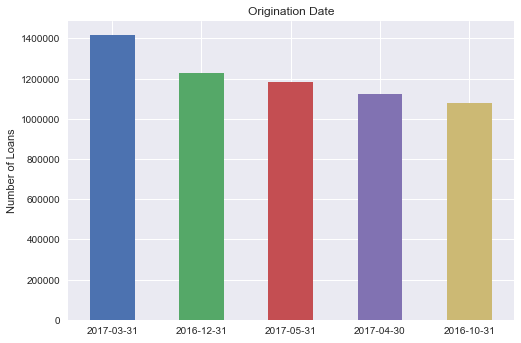

Top  10  counts:  
 2017-03-31    1416784
2016-12-31    1227394
2017-05-31    1184396
2017-04-30    1124943
2016-10-31    1078464
2016-09-30    1062917
2017-08-31    1048110
2016-11-30    1032031
2017-07-31    1024725
2017-01-31     994864
Name: originationdate, dtype: int64


In [40]:
#set origination date as index
#df.set_index(['originationdate'])
# draw origination date chart
draw(df.originationdate, title='Origination Date', ylabel='Number of Loans', sort=True, n=10)

In [41]:
# statistics for origination date
df.originationdate.describe()

count       29545877
unique            81
top       2017-03-31
freq         1416784
Name: originationdate, dtype: object

Top ten mean current deliquncy status by origination date

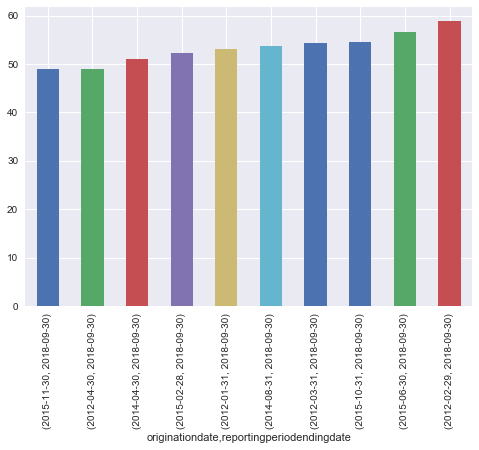

In [42]:
df.groupby([df.originationdate, df.reportingperiodendingdate]).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

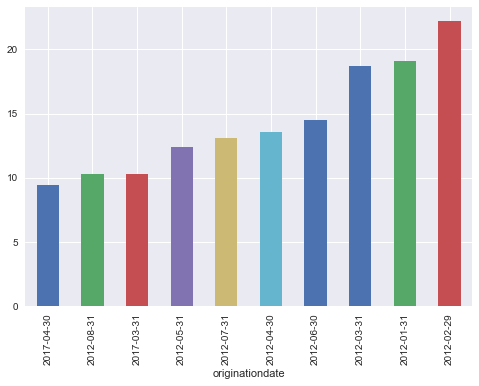

In [43]:
df.groupby(df.originationdate).currentdelinquencystatus.mean().sort_values().tail(n=10).plot(kind='bar')

# Originators Name

In [44]:
df.originatorname.unique()

array(['BMW Bank of North America', 'BMW Financial Services NA LLC', 'SC',
       'Mechanics Bank', 'TMCC', 'AHFC',
       'USAAFSB                                           ', 'NMAC',
       'Fifth Third Bank', 'VW Credit',
       'MBFS USA LLC                                      ', 'Ford Credit',
       'HCA', 'WORLD OMNI FINANCIAL CORP', 'CBS', 'GM FINANCIAL',
       'Ally Bank'], dtype=object)

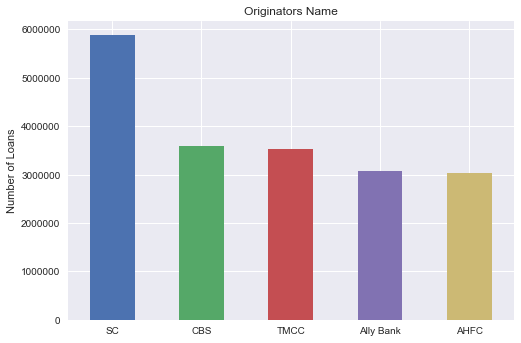

Top  -1  counts:  
 SC                                                    5882726
CBS                                                   3598244
TMCC                                                  3536459
Ally Bank                                             3070699
AHFC                                                  3029796
GM FINANCIAL                                          2748137
NMAC                                                  1805919
Ford Credit                                           1688988
WORLD OMNI FINANCIAL CORP                             1536039
HCA                                                   1090356
BMW Bank of North America                              426891
Fifth Third Bank                                       310976
Mechanics Bank                                         284360
USAAFSB                                                227457
VW Credit                                              207888
MBFS USA LLC                                      

In [45]:
# draw charts for originators name
draw(df.originatorname, title='Originators Name', ylabel='Number of Loans', sort=True)

# Create Features for Originators

In [46]:
df['originatorname']=df.originatorname.astype('category')

In [47]:
# create feature columns for categories within originator name 
def map_originatorname(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.originatorname).index.tolist()

for code in codes:
        df['originator_{}'.format(code)] = list(map(map_originatorname, df.originatorname))
        print('Added Column for :   originator_'+code)
print('New Dataframe shape : ', df.shape)

Added Column for :   originator_SC
Added Column for :   originator_CBS
Added Column for :   originator_TMCC
Added Column for :   originator_Ally Bank
Added Column for :   originator_AHFC
Added Column for :   originator_GM FINANCIAL
Added Column for :   originator_NMAC
Added Column for :   originator_Ford Credit
Added Column for :   originator_WORLD OMNI FINANCIAL CORP
Added Column for :   originator_HCA
Added Column for :   originator_BMW Bank of North America
Added Column for :   originator_Fifth Third Bank
Added Column for :   originator_Mechanics Bank
Added Column for :   originator_USAAFSB                                           
Added Column for :   originator_VW Credit
Added Column for :   originator_MBFS USA LLC                                      
Added Column for :   originator_BMW Financial Services NA LLC
New Dataframe shape :  (29545877, 80)


In [48]:
# drop originator name column
df.drop(['originatorname'],axis=1, inplace=True)
# new number of rows and columns
df.shape

(29545877, 79)

# Original Loan Amount

In [49]:
df.groupby(df.reportingperiodendingdate).originalloanamount.mean()

reportingperiodendingdate
2016-12-31    23499.758086
2017-01-31    23426.627053
2017-02-28    24408.563931
2017-03-31    19392.967107
2017-11-30    33450.714108
2017-12-31    22738.087680
2018-01-31    27952.585437
2018-02-28    24001.135384
2018-03-31    23751.070808
2018-04-30    23760.034267
2018-05-31    23855.966093
2018-06-30    24017.885074
2018-07-31    25704.122132
2018-08-31    23714.321477
2018-09-30    20221.398766
Name: originalloanamount, dtype: float64

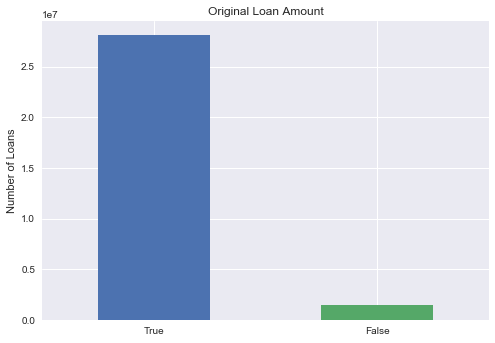

Top  -1  counts:  
 True    28111228
Name: originalloanamount, dtype: int64


In [50]:
# draw chart for original loan amount as filered in the next variable(original_loan_in_excess) 
original_loan_in_excess = 10000
draw(df.originalloanamount>original_loan_in_excess, title='Original Loan Amount', ylabel='Number of Loans', sort=True)

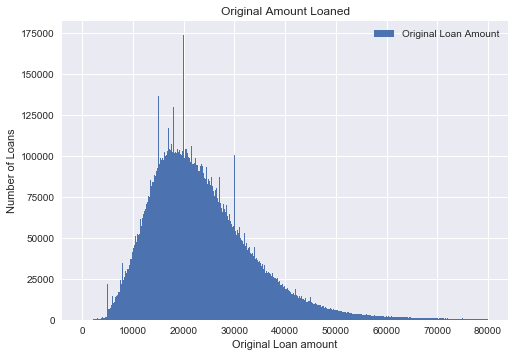

In [51]:
#draw a chart to view distribution of original loan amount
bins = np.linspace(0, 80000, 1000)
plt.hist(df.originalloanamount, bins, label='Original Loan Amount')
plt.legend(loc='upper right')
plt.title("Original Amount Loaned")
plt.xlabel('Original Loan amount')
plt.ylabel('Number of Loans')
plt.show()

In [52]:
# get statistics for original loan amount
df.originalloanamount.describe()

count    2.954588e+07
mean     2.375660e+04
std      1.076533e+04
min      5.510000e+02
25%      1.624237e+04
50%      2.192698e+04
75%      2.912244e+04
max      2.432811e+05
Name: originalloanamount, dtype: float64

In [53]:
# To remove rows with zero, non-negative or blank values for original loan amount

u=pd.value_counts(df.originalloanamount<=0)
if len(u)<2:
    print('No original loan amount blank or below zero')
else: 
    print('Number of original loan amount rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan amount more than zero')
    df=df[df.originalloanamount>0]
df.shape

No original loan amount blank or below zero


(29545877, 79)

# Original Loan Term

In [54]:
df.groupby(df.reportingperiodendingdate).originalloanterm.mean()

reportingperiodendingdate
2016-12-31    67.167942
2017-01-31    66.745404
2017-02-28    66.207702
2017-03-31    66.135396
2017-11-30    63.560951
2017-12-31    67.132079
2018-01-31    70.416080
2018-02-28    66.891629
2018-03-31    67.001881
2018-04-30    67.012369
2018-05-31    67.013476
2018-06-30    67.223207
2018-07-31    65.950912
2018-08-31    67.762346
2018-09-30    68.923208
Name: originalloanterm, dtype: float64

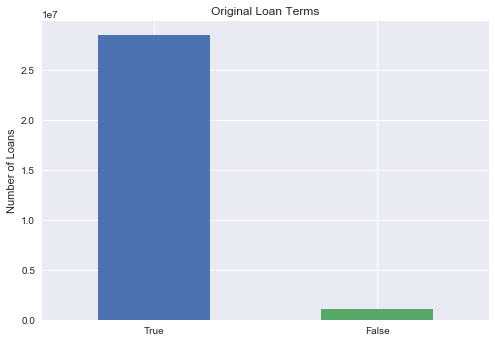

Top  -1  counts:  
 True    28480690
Name: originalloanterm, dtype: int64


In [55]:
# draw chart for original loan term based on the input of variable below(original_loan_term_excess)
original_loan_term_excess = 48
draw(df.originalloanterm>original_loan_term_excess, title='Original Loan Terms', ylabel='Number of Loans',sort=True)

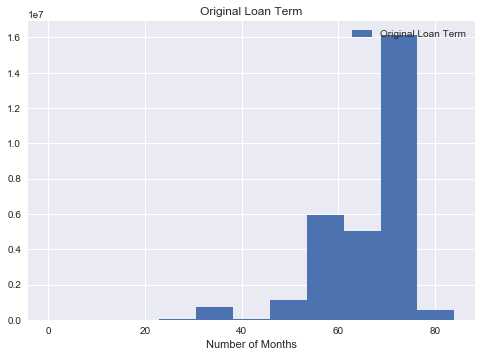

In [56]:
#chart for the distribution of original loan term
bins = np.linspace(0, 84, 12)
plt.hist(df.originalloanterm, bins, label='Original Loan Term')
plt.legend(loc='upper right')
plt.title("Original Loan Term")
plt.xlabel('Number of Months')
#plt.ylabel('Number of Loans')
plt.show()

In [57]:
#statistics for original loan term
df.originalloanterm.describe()

count    2.954588e+07
mean     6.711513e+01
std      8.468860e+00
min      1.000000e+01
25%      6.100000e+01
50%      7.200000e+01
75%      7.300000e+01
max      8.600000e+01
Name: originalloanterm, dtype: float64

In [58]:
# remove rows with zero, blank or negative original loan term

u=pd.value_counts(df.originalloanterm<=0)
if len(u)<2:
    print('No original loan term blank or below zero')
else: 
    print('Number of original loan term rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original loan term more than zero')
    df=df[df.originalloanterm>0]
# new number of rows and columns of the dataframe
df.shape

No original loan term blank or below zero


(29545877, 79)

# Original interest rate percentage

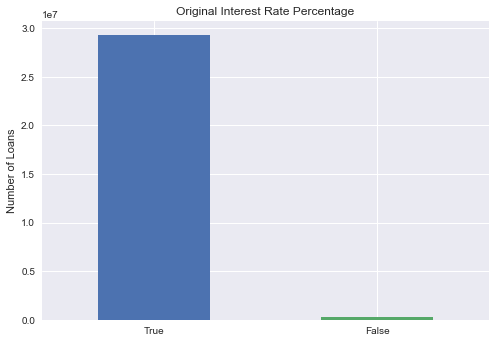

Top  -1  counts:  
 True    29274465
Name: originalinterestratepercentage, dtype: int64


In [59]:
# draw a chart with a filter input as below (originalinterestratepercentage_excess)
originalinterestratepercentage_excess = 2.0
draw(df.originalinterestratepercentage<originalinterestratepercentage_excess, title='Original Interest Rate Percentage', ylabel='Number of Loans',sort=True)

In [60]:
# get statistics for originalinterestratepercentage
#df.originalinterestratepercentage.describe()

In [61]:
# drop rows with blank or negative original interest rate percentage and research on zero interest rate loans
u=pd.value_counts(df.originalinterestratepercentage<0)
if len(u)<2:
    print('No original interest rate blank or below zero')
else: 
    print('Number of original interest rate rows blank or below zero',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    df=df[df.originalinterestratepercentage>=0]
df.shape

No original interest rate blank or below zero


(29545877, 79)

# No interest rate loans

In [62]:
# view zero original interest rate percentage loans
u=pd.value_counts(df.originalinterestratepercentage==0)
if len(u)<2:
    print('No zero original interest rate percentage')
else: 
    print('Number of zero original interest rate rows',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with original interest rate with non-negative values')
    #df=df[df.originalinterestratepercentage>=0]
df.shape

Number of zero original interest rate rows : 3458939


(29545877, 79)

# Underwriting Indicator

In [63]:
df.underwritingindicator.unique()

array([True, False], dtype=object)

In [64]:
df['underwritingindicator']=df.underwritingindicator.astype('category')

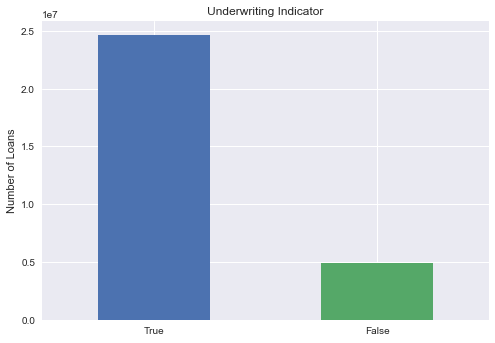

Top  -1  counts:  
 True    24630967
Name: underwritingindicator, dtype: int64


In [65]:
draw(df.underwritingindicator, title='Underwriting Indicator', ylabel='Number of Loans', sort=True)

Create Feature Column for Underwriting TRUE

In [66]:
def map_underwriting_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == True:
            return 1
        elif column == False:
            return 0
        
df['underwriting_true'] = list(map(map_underwriting_true, df.underwritingindicator))
df.drop(['underwritingindicator'], axis=1, inplace=True)
pd.value_counts(df.underwriting_true)

1    24630967
0     4914910
Name: underwriting_true, dtype: int64

# Subvented

In [67]:
df.subvented.unique()

array(['["98"]', '["2"]', '["1"]', '["0"]', '["1","2"]', '["1","98"]',
       '["1"," 2"]', '["1"," 98"]', '["2","1"]'], dtype=object)

In [68]:
df['subvented']=df.subvented.astype('category')

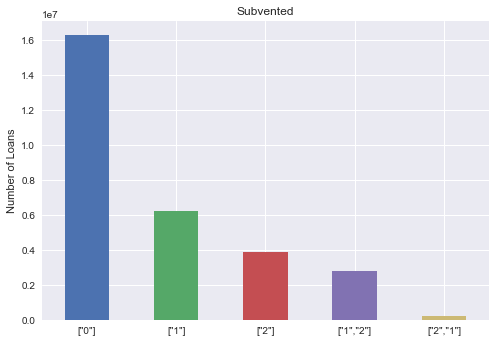

Top  -1  counts:  
 ["0"]         16306649
["1"]          6254274
["2"]          3873442
["1","2"]      2798353
["2","1"]       227251
["98"]           82966
["1"," 2"]        2595
["1","98"]         238
Name: subvented, dtype: int64


In [69]:
draw(df.subvented, title='Subvented', ylabel='Number of Loans', sort=True)

In [70]:
df.subvented.describe(include='all')

count     29545877
unique           9
top          ["0"]
freq      16306649
Name: subvented, dtype: object

Create Feature Column for Subvented

In [71]:
# create feature columns for subvented
def map_subvented(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.subvented).index.tolist()

for code in codes:
        df['subvented_{}'.format(code)] = list(map(map_subvented, df.subvented))
        print('Added Column for :   subvented_'+code)
print('New Dataframe shape : ', df.shape)
df.drop(['subvented'], axis=1, inplace=True)

Added Column for :   subvented_["0"]
Added Column for :   subvented_["1"]
Added Column for :   subvented_["2"]
Added Column for :   subvented_["1","2"]
Added Column for :   subvented_["2","1"]
Added Column for :   subvented_["98"]
Added Column for :   subvented_["1"," 2"]
Added Column for :   subvented_["1","98"]
Added Column for :   subvented_["1"," 98"]
New Dataframe shape :  (29545877, 88)


# Vehicle New or Used code

In [72]:
df.vehiclenewusedcode.unique()

array([ 1.,  2.])

In [73]:
df['vehiclenewusedcode']=df.vehiclenewusedcode.astype('category')

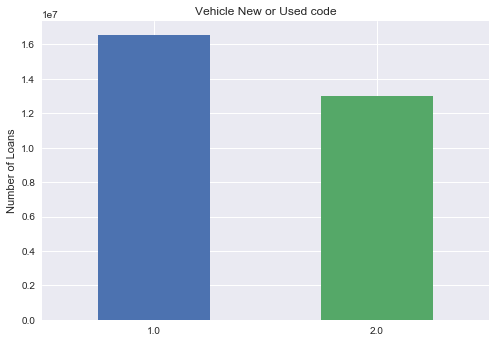

Top  -1  counts:  
 1.0    16547346
Name: vehiclenewusedcode, dtype: int64


In [74]:
draw(df.vehiclenewusedcode, title='Vehicle New or Used code', ylabel='Number of Loans', sort=True)

# Create Feature Column for New or Used

In [75]:
def map_vehiclenewusedcode_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['vehiclenew_true'] = list(map(map_vehiclenewusedcode_true, df.vehiclenewusedcode))
df.drop(['vehiclenewusedcode'], axis=1, inplace=True)
pd.value_counts(df.vehiclenew_true)

1    16547346
0    12998531
Name: vehiclenew_true, dtype: int64

# Vehicle Type code

In [76]:
df.vehicletypecode.unique()

array([  3.,   1.,   4.,   2.,  99.,  98.])

In [77]:
df['vehicletypecode']=df.vehicletypecode.astype('category')

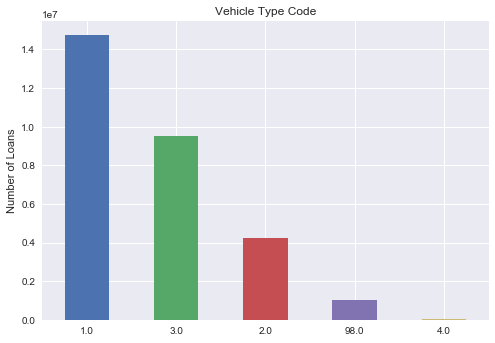

Top  -1  counts:  
 1.0     14745179
3.0      9501220
2.0      4254556
98.0     1008707
4.0        31419
Name: vehicletypecode, dtype: int64


In [78]:
draw(df.vehicletypecode, title='Vehicle Type Code', ylabel='Number of Loans', sort=True)

In [79]:
df.vehicletypecode.describe()

count     29545877.0
unique           6.0
top              1.0
freq      14745179.0
Name: vehicletypecode, dtype: float64

In [80]:
df.drop(['vehicletypecode'],axis=1, inplace=True)
df.shape

(29545877, 86)

# Obligor Credit Score Type

In [81]:
df.obligorcreditscoretype.unique()

array(['FICO', 'Bureau', 'FICO Score 2 Auto', 'FICO Score 8 Auto',
       'Credit Bureau', 'Consumer Bureau', 'Commercial Bureau',
       'Consumer Credit Bureau', 'Unknown/Invalid', 'CREDIT BUREAU',
       'Credit Bureau Score', 'None'], dtype=object)

In [82]:
df['obligorcreditscoretype']=df.obligorcreditscoretype.astype('category')

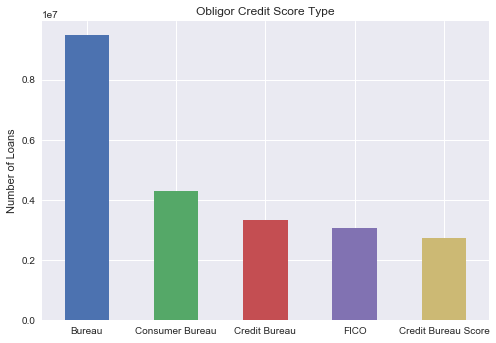

Top  -1  counts:  
 Bureau                    9480970
Consumer Bureau           4272777
Credit Bureau             3338273
FICO                      3055956
Credit Bureau Score       2729877
FICO Score 8 Auto         1804956
FICO Score 2 Auto         1731503
CREDIT BUREAU             1536039
Consumer Credit Bureau    1083786
Commercial Bureau          467420
None                        37750
Name: obligorcreditscoretype, dtype: int64


In [83]:
draw(df.obligorcreditscoretype, title='Obligor Credit Score Type', ylabel='Number of Loans', sort=True)

In [84]:
df.obligorcreditscoretype.describe()

count     29545877
unique          12
top         Bureau
freq       9480970
Name: obligorcreditscoretype, dtype: object

In [85]:
pd.value_counts(df.obligorcreditscoretype==0)

False    29545877
Name: obligorcreditscoretype, dtype: int64

Create features for obligator credit score type

In [86]:
def map_obligorcreditscoretype(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorcreditscoretype).index.tolist()

for code in codes:
        df['credit_type_{}'.format(code)] = list(map(map_obligorcreditscoretype, df.obligorcreditscoretype))

In [87]:
df.drop(['obligorcreditscoretype'], axis=1, inplace=True)
df.shape

(29545877, 97)

# Obligor Credit Score

In [88]:
#df.obligorcreditscore.isnull().values.any()

In [89]:
#df.obligorcreditscore.value_counts(dropna=False).sort_values(ascending=False).head()

In [90]:
#df.obligorcreditscore.value_counts('NaN').head()

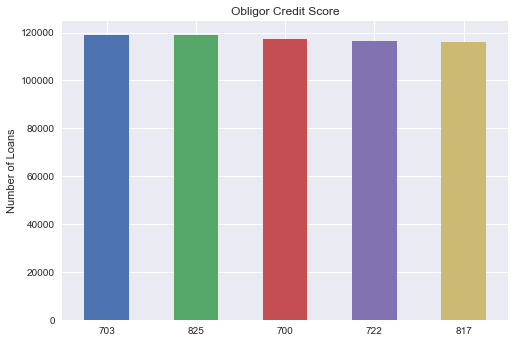

Top  10  counts:  
 703    118951
825    118942
700    117147
722    116410
817    115888
729    114801
677    112801
701    110894
827    110445
678    109554
Name: obligorcreditscore, dtype: int64


In [91]:
draw(df.obligorcreditscore, title='Obligor Credit Score', ylabel='Number of Loans', sort=True, n=10)

In [92]:
df.obligorcreditscore.describe()

count     28728726
unique        1418
top            703
freq        118951
Name: obligorcreditscore, dtype: object

In [93]:
#string has no numbers
df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False).sum()


C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


991806

In [94]:
df[df.obligorcreditscore.astype(str).str.contains(r'^([^0-9]*)$', na=False)].obligorcreditscore.unique()

C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array([nan, 'No Score', 'NONE', 'None'], dtype=object)

In [95]:
#to find only numbers
df.obligorcreditscore.str.contains(r'^([0-9]*)$').sum()

C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


27856383

In [96]:
#find only blanks(empty strings) 
df.obligorcreditscore.str.contains(r'^(\s+)$').sum()

C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


0

In [97]:
df[df.obligorcreditscore.str.contains('No Score',na=False)].sum()

cik                                                                                                   156169675532
assetnumber                                                      0657390006100657390006180657390006420657390006...
reportingperiodbeginningdate                                     2016-12-012016-12-012016-12-012016-12-012016-1...
reportingperiodendingdate                                        2016-12-312016-12-312016-12-312016-12-312016-1...
originationdate                                                  2012-01-312012-01-312012-01-312012-01-312012-0...
originalloanamount                                                                                     2.98163e+09
originalloanterm                                                                                       5.49472e+06
originalinterestratepercentage                                                                             4036.94
originalfirstpaymentdate                                         2012-02-292012-

In [98]:
df[~df.obligorcreditscore.str.contains('No Score', na=False)]

,cik,assetnumber,reportingperiodbeginningdate,reportingperiodendingdate,originationdate,originalloanamount,originalloanterm,originalinterestratepercentage,originalfirstpaymentdate,graceperiodnumber,...,credit_type_Credit Bureau,credit_type_FICO,credit_type_Credit Bureau Score,credit_type_FICO Score 8 Auto,credit_type_FICO Score 2 Auto,credit_type_CREDIT BUREAU,credit_type_Consumer Credit Bureau,credit_type_Commercial Bureau,credit_type_None,credit_type_Unknown/Invalid
0,1725617,1001536189,2017-11-01,2017-11-30,2012-12-31,25124.50,72.0,3.2900,2013-01-31,0.0,...,0,1,0,0,0,0,0,0,0,0
1,1725617,1001536759,2017-11-01,2017-11-30,2012-12-31,43257.34,72.0,3.2900,2013-02-28,1.0,...,0,1,0,0,0,0,0,0,0,0
2,1725617,1001536970,2017-11-01,2017-11-30,2012-12-31,56917.54,72.0,3.2900,2013-02-28,1.0,...,0,1,0,0,0,0,0,0,0,0
3,1725617,1001537061,2017-11-01,2017-11-30,2012-12-31,42003.57,72.0,3.2900,2013-01-31,1.0,...,0,1,0,0,0,0,0,0,0,0
4,1725617,1001537088,2017-11-01,2017-11-30,2012-12-31,77217.85,72.0,3.2900,2013-02-28,1.0,...,0,1,0,0,0,0,0,0,0,0
5,1725617,1001538073,2017-11-01,2017-11-30,2012-12-31,27784.19,72.0,3.2900,2013-02-28,1.0,...,0,1,0,0,0,0,0,0,0,0
6,1725617,1001538680,2017-11-01,2017-11-30,2012-12-31,43397.80,72.0,3.2900,2013-02-28,1.0,...,0,1,0,0,0,0,0,0,0,0
7,1725617,1001565943,2017-11-01,2017-11-30,2013-02-28,49345.92,72.0,3.1900,2013-03-31,0.0,...,0,1,0,0,0,0,0,0,0,0
8,1725617,1001566705,2017-11-01,2017-11-30,2013-02-28,45763.89,66.0,3.1900,2013-03-31,0.0,...,0,1,0,0,0,0,0,0,0,0
9,1725617,1001566738,2017-11-01,2017-11-30,2013-02-28,45756.02,72.0,3.1900,2013-03-31,1.0,...,0,1,0,0,0,0,0,0,0,0


In [99]:
#df.obligorcreditscore.str.contains('No Score').sum()

In [100]:
pd.crosstab(df.reportingperiodendingdate, df.obligorcreditscore)

obligorcreditscore,0,1,10,100,11,12,13,14,15,16,...,93,94,95,96,97,98,99,NONE,No Score,None
reportingperiodendingdate,,,,,,,,,,,,,,,,,,,,,
2016-12-31,1,131,98,126,113,102,106,97,113,117,...,80,65,75,97,108,111,119,833,2255,456
2017-01-31,1,131,98,126,113,102,106,97,113,117,...,80,65,75,97,108,111,119,833,2255,456
2017-02-28,2461,127,97,122,113,102,104,97,111,117,...,77,63,73,94,107,110,113,0,2175,456
2017-03-31,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,647,0,0
2017-11-30,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,243
2017-12-31,5079,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4450,0,2155
2018-01-31,1018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-02-28,7187,319,249,371,289,274,262,273,291,297,...,200,188,212,232,256,285,314,3740,9719,3461
2018-03-31,7126,317,244,365,285,272,259,267,287,295,...,194,182,212,229,253,280,311,5269,9463,4636


In [101]:
df=df[~df.obligorcreditscore.str.contains(r'^([^0-9]*)$', na=False)]

C:\Progra~1\Anaconda3_4\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [102]:
df.isnull().sum()

cik                                                                     0
assetnumber                                                             0
reportingperiodbeginningdate                                            0
reportingperiodendingdate                                               0
originationdate                                                         0
originalloanamount                                                      0
originalloanterm                                                        0
originalinterestratepercentage                                          0
originalfirstpaymentdate                                                0
graceperiodnumber                                                       0
obligorcreditscore                                                 817151
obligorincomeverificationlevelcode                                 214786
obligoremploymentverificationcode                                  214786
coobligorindicator                    

In [103]:
df.obligorcreditscore.isnull().value_counts()

False    28554071
True       817151
Name: obligorcreditscore, dtype: int64

In [104]:
df[df.obligorcreditscore.isnull()]

,cik,assetnumber,reportingperiodbeginningdate,reportingperiodendingdate,originationdate,originalloanamount,originalloanterm,originalinterestratepercentage,originalfirstpaymentdate,graceperiodnumber,...,credit_type_Credit Bureau,credit_type_FICO,credit_type_Credit Bureau Score,credit_type_FICO Score 8 Auto,credit_type_FICO Score 2 Auto,credit_type_CREDIT BUREAU,credit_type_Consumer Credit Bureau,credit_type_Commercial Bureau,credit_type_None,credit_type_Unknown/Invalid
429806,1742444,1067258,2018-05-01,2018-05-31,2012-05-31,16217.08,72.0,0.2400,2012-06-30,1.0,...,0,0,0,0,0,0,0,0,0,0
429814,1742444,10696264,2018-05-01,2018-05-31,2014-08-31,13076.00,72.0,0.2500,2014-10-31,2.0,...,0,0,0,0,0,0,0,0,0,0
429819,1742444,1072213,2018-05-01,2018-05-31,2012-05-31,20067.63,72.0,0.1900,2012-06-30,1.0,...,0,0,0,0,0,0,0,0,0,0
429823,1742444,1079219,2018-05-01,2018-05-31,2012-04-30,34999.45,72.0,0.1800,2012-06-30,2.0,...,0,0,0,0,0,0,0,0,0,0
429887,1742444,1278848,2018-05-01,2018-05-31,2012-05-31,12705.55,72.0,0.1800,2012-07-31,2.0,...,0,0,0,0,0,0,0,0,0,0
429896,1742444,12970837,2018-05-01,2018-05-31,2015-06-30,16574.42,60.0,0.1019,2015-07-31,1.0,...,0,0,0,0,0,0,0,0,0,0
429937,1742444,1417786,2018-05-01,2018-05-31,2012-06-30,16829.64,72.0,0.2599,2012-08-31,2.0,...,0,0,0,0,0,0,0,0,0,0
429943,1742444,14226666,2018-05-01,2018-05-31,2015-09-30,16739.42,72.0,0.2400,2015-11-30,2.0,...,0,0,0,0,0,0,0,0,0,0
429983,1742444,14675421,2018-05-01,2018-05-31,2015-12-31,18447.68,72.0,0.1678,2016-01-31,1.0,...,0,0,0,0,0,0,0,0,0,0
429992,1742444,14802288,2018-05-01,2018-05-31,2015-12-31,15485.00,72.0,0.1823,2016-01-31,1.0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
df=df.dropna(subset=['obligorcreditscore'])

In [106]:
df.obligorcreditscore.value_counts(dropna=False).sort_values(ascending=False).head()

703    118951
825    118942
700    117147
722    116410
817    115888
Name: obligorcreditscore, dtype: int64

In [107]:
df.obligorcreditscore.isnull().values.any()

False

In [108]:
# codes = pd.value_counts(df.obligorcreditscore).index.tolist()
# print(codes)

In [109]:
#df.obligorcreditscore.str.contains('No Score').sum()

In [110]:
#~df.obligorcreditscore.str.contains('No Score').sum()

In [111]:

# u=pd.value_counts(df.obligorcreditscore.str.contains('No Score'))
# if len(u)==0:
#     print('No rows with No Score string' )
# else: 
#     print('Number of loans with No Score string',':', len(u))
#     print('Dropping ', len(u), 'rows and retaining loans with credit score')
#     df=df.fillna(inplace=True)
#     df=df.drop(df.obligorcreditscore.str.contains('No Score'), axis=1)
        
# df.shape

# Obligor Income Verification Level Code

In [112]:
df['obligorincomeverificationlevelcode']=df.obligorincomeverificationlevelcode.astype('category')

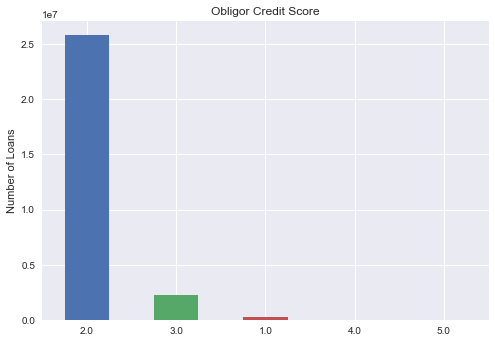

Top  -1  counts:  
 2.0    25818262
3.0     2280564
1.0      239934
4.0         452
Name: obligorincomeverificationlevelcode, dtype: int64


In [113]:
draw(df.obligorincomeverificationlevelcode, title='Obligor Credit Score', ylabel='Number of Loans', sort=True)

In [114]:
df.obligorincomeverificationlevelcode.describe()

count     28339285.0
unique           5.0
top              2.0
freq      25818262.0
Name: obligorincomeverificationlevelcode, dtype: float64

In [115]:
pd.value_counts(df.obligorincomeverificationlevelcode)

2.0    25818262
3.0     2280564
1.0      239934
4.0         452
5.0          73
Name: obligorincomeverificationlevelcode, dtype: int64

In [116]:
u=pd.value_counts(df.obligorincomeverificationlevelcode==0)
if len(u)<2:
    print('No blank or zero obligor income verification level code')
else: 
    print('Number of loans with no obligor income verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor income verification level code')
    df=df[df.obligorincomeverificationlevelcode>0]
df.shape

No blank or zero obligor income verification level code


(28554071, 97)

# Create Feature Columns for Obligor Income Verification Code

In [117]:
def map_obligorincomeverificationlevelcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligorincomeverificationlevelcode).index.tolist()

for code in codes:
        df['income_code{}'.format(code)] = list(map(map_obligorincomeverificationlevelcode, df.obligorincomeverificationlevelcode))


In [118]:
df.drop(['obligorincomeverificationlevelcode'], axis=1, inplace=True)

# Obligor Employment Verification Code

In [119]:
df['obligoremploymentverificationcode']=df.obligoremploymentverificationcode.astype('category')

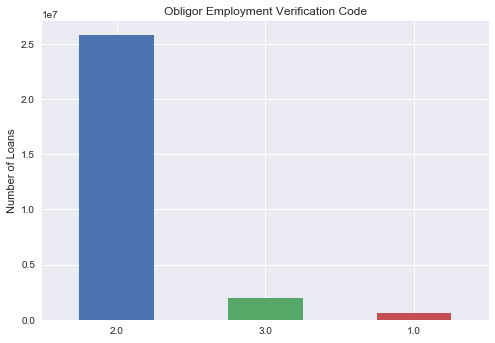

Top  -1  counts:  
 2.0    25775444
3.0     1988744
Name: obligoremploymentverificationcode, dtype: int64


In [120]:
draw(df.obligoremploymentverificationcode, title='Obligor Employment Verification Code', ylabel='Number of Loans', sort=True)

In [121]:
#pd.value_counts(df.obligoremploymentverificationcode==0)

In [122]:
df.obligoremploymentverificationcode.describe()

count     28339285.0
unique           3.0
top              2.0
freq      25775444.0
Name: obligoremploymentverificationcode, dtype: float64

In [123]:
u=pd.value_counts(df.obligoremploymentverificationcode==0)
if len(u)<2:
    print('No blank or zero obligor employment verification level code')
else: 
    print('Number of loans with no obligor employment verification level code',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with obligor employment verification level code')
    df=df[df.obligoremploymentverificationcode>0]
df.shape

No blank or zero obligor employment verification level code


(28554071, 101)

# Create feature Columns for obligor employment verification

In [124]:
def map_obligoremploymentverificationcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.obligoremploymentverificationcode).index.tolist()

for code in codes:
        df['empl_code{}'.format(code)] = list(map(map_obligoremploymentverificationcode, df.obligoremploymentverificationcode))


In [125]:
df.drop(['obligoremploymentverificationcode'], axis=1, inplace=True)

# Co-obligator Indicator

In [126]:
df['coobligorindicator']=df.coobligorindicator.astype('category')

In [127]:
df.coobligorindicator.describe()

count     28554071
unique           2
top          False
freq      18675803
Name: coobligorindicator, dtype: object

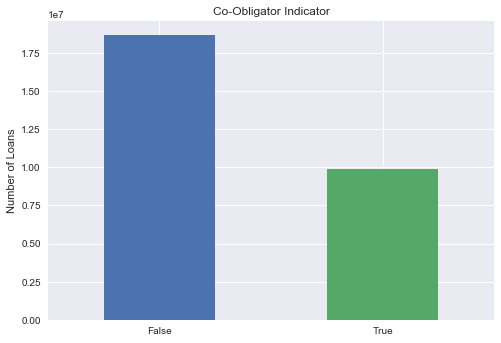

Top  -1  counts:  
 False    18675803
Name: coobligorindicator, dtype: int64


In [128]:
draw(df.coobligorindicator, title='Co-Obligator Indicator', ylabel='Number of Loans', sort=True)

# Create features for Co-obligator Indicator True

In [129]:
def map_coobligorindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['coobligorindicator_true'] = list(map(map_coobligorindicator_true, df.coobligorindicator))
df.drop(['coobligorindicator'], axis=1, inplace=True)
pd.value_counts(df.coobligorindicator_true)

0    18675803
1     9878268
Name: coobligorindicator_true, dtype: int64

# Reporting Period Actual End Balance Amount

Mean reporting period actual end balance amount by the reporting period ending date

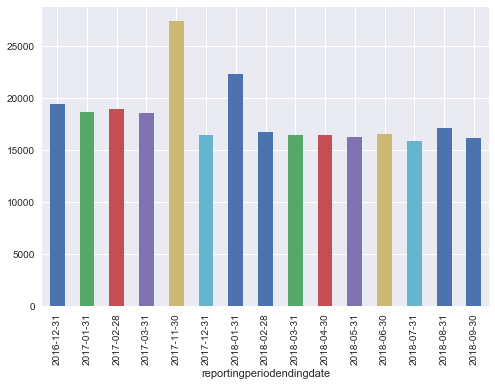

In [130]:
df.groupby(df.reportingperiodendingdate).reportingperiodactualendbalanceamount.mean().plot(kind='bar')

In [131]:
#draw(df.reportingperiodactualendbalanceamount, title='Reporting Period Actual End Balance Amount', ylabel='Number of Loans', sort=True)

In [132]:
df.reportingperiodactualendbalanceamount.describe()

count    2.855407e+07
mean     1.662460e+04
std      1.029135e+04
min     -9.978260e+03
25%      9.861590e+03
50%      1.550965e+04
75%      2.200183e+04
max      2.111091e+05
Name: reportingperiodactualendbalanceamount, dtype: float64

In [133]:
u=pd.value_counts(df.reportingperiodactualendbalanceamount<=0)
if len(u)<2:
    print('No blank or zero or negative reporting period actual end balance amount')
else: 
    print('Number of loans with no reporting period actual end balance amount',':', u[1])
    print('Dropping ', u[1], 'rows and retaining loans with reporting period actual end balance amount')
    df=df[df.reportingperiodactualendbalanceamount>0]
df.shape

Number of loans with no reporting period actual end balance amount : 984062
Dropping  984062 rows and retaining loans with reporting period actual end balance amount


(27570009, 103)

# Total Actual amount paid

In [134]:
df.totalactualamountpaid.describe()

count    2.755100e+07
mean     4.595003e+02
std      6.747729e+02
min     -7.203197e+04
25%      2.875300e+02
50%      4.000000e+02
75%      5.497100e+02
max      2.041267e+05
Name: totalactualamountpaid, dtype: float64

In [135]:
u=pd.value_counts(df.totalactualamountpaid<=0)
if len(u)<2:
    print('No blank or zero or negative total actual amount paid')
else: 
    print('Number of loans with no or negative total actual amount paid',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.totalactualamountpaid>0]
df.shape

Number of loans with no or negative total actual amount paid : 2742210


(27570009, 103)

# Actual interest collected amount

In [136]:
df.actualinterestcollectedamount.describe()

count    2.755100e+07
mean     9.523242e+01
std      1.374802e+02
min     -1.303820e+03
25%      7.490000e+00
50%      4.334000e+01
75%      1.239600e+02
max      5.538290e+03
Name: actualinterestcollectedamount, dtype: float64

In [137]:
u=pd.value_counts(df.actualinterestcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual interest collected amount')
else: 
    print('Number of loans with no or negative actual interest collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual interest collected amount')
    #df=df[df.actualinterestcollectedamount>0]
df.shape

Number of loans with no or negative actual interest collected amount : 5964201


(27570009, 103)

# Actual principal collected amount

In [138]:
df.actualprincipalcollectedamount.describe()

count    2.755100e+07
mean     3.635210e+02
std      6.625728e+02
min     -7.203197e+04
25%      1.787600e+02
50%      3.085800e+02
75%      4.541000e+02
max      2.031540e+05
Name: actualprincipalcollectedamount, dtype: float64

In [139]:
u=pd.value_counts(df.actualprincipalcollectedamount<=0)
if len(u)<2:
    print('No blank or zero actual principal collected amount')
else: 
    print('Number of loans with zero or negative actual principal collected amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive actual principal collected amount')
    #df=df[df.actualprincipalcollectedamount>0]
df.shape

Number of loans with zero or negative actual principal collected amount : 3396019


(27570009, 103)

# Interest paid through date

In [140]:
pd.value_counts(df.interestpaidthroughdate).head(n=10)

1900-01-01    1323367
2018-06-15     225645
2018-06-29     187585
2018-03-30     176286
2018-05-25     169179
2018-04-20     167682
2018-05-15     167560
2018-02-28     165562
2018-04-13     161320
2018-05-18     160555
Name: interestpaidthroughdate, dtype: int64

In [141]:
df.interestpaidthroughdate.describe()

count       26594777
unique          2099
top       1900-01-01
freq         1323367
Name: interestpaidthroughdate, dtype: object

In [142]:
u=pd.value_counts(df.interestpaidthroughdate=='1900-01-01')
if len(u)<2:
    print('No blank or zero interest paid throughdate as 1900-01-01')
else: 
    print('Number of loans with zero or 1900-01-01 as  interest paid throughdate',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

Number of loans with zero or 1900-01-01 as  interest paid throughdate : 1323367


(27570009, 103)

In [143]:
df.drop(['interestpaidthroughdate'], axis=1, inplace=True)
df.shape

(27570009, 102)

# Days from origination to first payment date

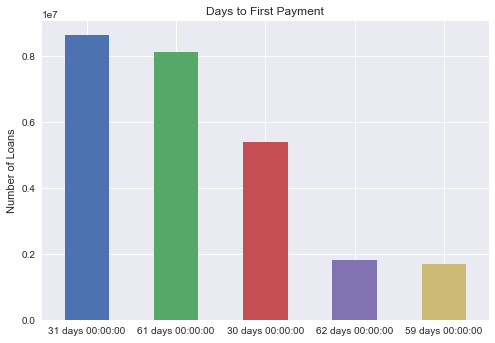

Top  -1  counts:  
 31 days     8641594
61 days     8120162
30 days     5396118
62 days     1805787
59 days     1688986
28 days      935868
60 days      276803
92 days      263501
29 days      156815
91 days      129805
90 days       79726
0 days        51016
89 days       20751
120 days       2393
122 days        404
-31 days        136
123 days         58
121 days         46
-62 days         14
-30 days         11
153 days          8
Name: daystofirstpayment, dtype: int64


In [144]:
df['daystofirstpayment'] = pd.to_datetime(df['originalfirstpaymentdate'])-pd.to_datetime(df['originationdate'])
#draw a chart for visual look and analysis
draw(df.daystofirstpayment, title='Days to First Payment', ylabel='Number of Loans', sort = True)


In [145]:
df.daystofirstpayment.describe()

count                   27570009
mean     44 days 14:17:20.446667
std      16 days 08:51:36.138760
min           -62 days +00:00:00
25%             31 days 00:00:00
50%             31 days 00:00:00
75%             61 days 00:00:00
max            214 days 00:00:00
Name: daystofirstpayment, dtype: object

In [146]:
#remove days string for machine learning
df['daystofirstpayment']=df.daystofirstpayment.map(lambda x: np.nan if pd.isnull(x) else x.days)
#display last five rows
df.daystofirstpayment.tail()

31511673    31
31511674    31
31511675    31
31511676    61
31511677    31
Name: daystofirstpayment, dtype: int64

In [147]:
u=pd.value_counts(df.daystofirstpayment==0)
if len(u)<2:
    print('No blank or zero days to first payment')
else: 
    print('Number of loans with zero days to first payment',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive total actual amount paid')
    #df=df[df.daystofirstpayment>0]
df.shape

Number of loans with zero days to first payment : 51016


(27570009, 103)

In [148]:
df.drop(['originalfirstpaymentdate'], axis=1, inplace=True)
df.shape

(27570009, 102)

# Grace Period

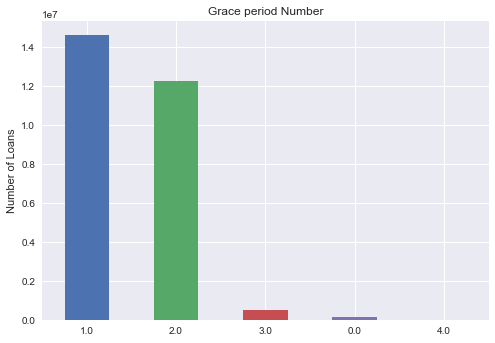

Top  -1  counts:  
 1.0    14624026
2.0    12282690
3.0      500053
0.0      160527
4.0        2705
Name: graceperiodnumber, dtype: int64


In [149]:
draw(df.graceperiodnumber, title='Grace period Number', ylabel='Number of Loans', sort = True)

In [150]:
df.graceperiodnumber.describe()

count    2.757001e+07
mean     1.476257e+00
std      5.458467e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.000000e+00
Name: graceperiodnumber, dtype: float64

In [151]:
u=pd.value_counts(df.graceperiodnumber==0)
if len(u)<2:
    print('No blank or zero grace period number')
else: 
    print('Number of loans with zero grace period number',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive grace period number')
    #df=df[df.graceperiodnumber>0]
df.shape

Number of loans with zero grace period number : 160527


(27570009, 102)

# Asset added indicator

In [152]:
df['assetaddedindicator']=df.assetaddedindicator.astype('category')

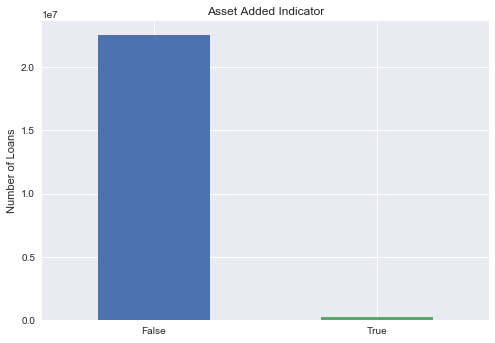

Top  -1  counts:  
 False    22560250
Name: assetaddedindicator, dtype: int64


In [153]:
draw(df.assetaddedindicator, title='Asset Added Indicator', ylabel='Number of Loans', sort = True)

In [154]:
df.assetaddedindicator.describe()

count     22767135
unique           2
top          False
freq      22560250
Name: assetaddedindicator, dtype: object

In [155]:
u=pd.value_counts(df.assetaddedindicator!=False)
if len(u)<2:
    print('No blank or zero Asset Added Indicator')
else: 
    print('Number of loans with zero or blank Asset Added Indicator',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with positive asset added indicator')
    #df=df[df.assetaddedindicator>0]
df.shape

Number of loans with zero or blank Asset Added Indicator : 5009759


(27570009, 102)

In [156]:
df.drop(['assetaddedindicator'], axis=1, inplace=True)
df.shape

(27570009, 101)

# Reporting Period Modification Indicator

In [157]:
df['reportingperiodmodificationindicator']=df.reportingperiodmodificationindicator.astype('category')

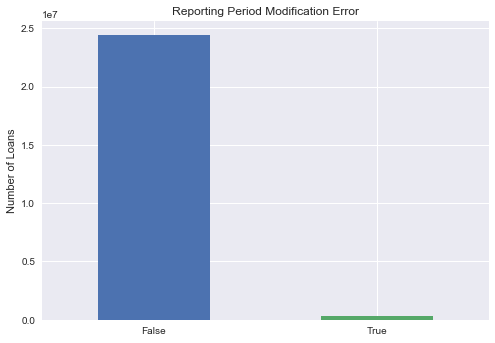

Top  -1  counts:  
 False    24417604
Name: reportingperiodmodificationindicator, dtype: int64


In [158]:
draw(df.reportingperiodmodificationindicator, title='Reporting Period Modification Error', ylabel='Number of Loans', sort = True)

In [159]:
df.reportingperiodmodificationindicator.describe()

count     24715832
unique           2
top          False
freq      24417604
Name: reportingperiodmodificationindicator, dtype: object

# Create Features for Reporting Period Modification Indicator True

In [160]:
def map_reportingperiodmodificationindicator_true(*args):
    columns = [col for col in args]
    for column in columns:
        if column == 1:
            return 1
        else:
            return 0
        
df['reportingperiodmodificationindicator_true'] = list(map(map_reportingperiodmodificationindicator_true, df.reportingperiodmodificationindicator))
df.drop(['reportingperiodmodificationindicator'], axis=1, inplace=True)
pd.value_counts(df.reportingperiodmodificationindicator_true)

0    27271781
1      298228
Name: reportingperiodmodificationindicator_true, dtype: int64

In [161]:
df.shape

(27570009, 101)

# Servicing Advance Method Code

In [162]:
df['servicingadvancemethodcode']=df.servicingadvancemethodcode.astype('category')

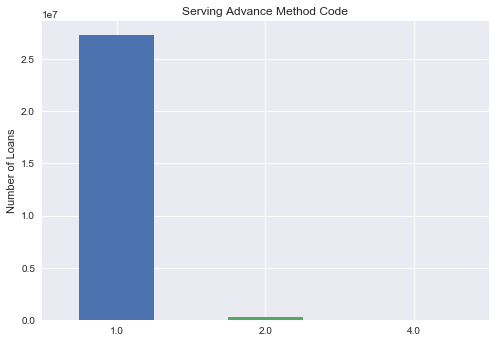

Top  -1  counts:  
 1.0    27312049
2.0      247705
Name: servicingadvancemethodcode, dtype: int64


In [163]:
draw(df.servicingadvancemethodcode, title='Serving Advance Method Code', ylabel='Number of Loans', sort = True)

In [164]:
df.servicingadvancemethodcode.describe()

count     27570009.0
unique           3.0
top              1.0
freq      27312049.0
Name: servicingadvancemethodcode, dtype: float64

# Create Feature Columns for Servicing Advance Method Codes

In [165]:
def map_servicingadvancemethodcode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.servicingadvancemethodcode).index.tolist()

for code in codes:
        df['servicingadvancemethod_code{}'.format(code)] = list(map(map_servicingadvancemethodcode, df.servicingadvancemethodcode))


In [166]:
df.drop(['servicingadvancemethodcode'], axis=1, inplace=True)
df.shape

(27570009, 103)

# Other Principal Adjustment Amount

In [167]:
df.otherprincipaladjustmentamount.describe()

count    2.756255e+07
mean    -1.542018e+01
std      6.718883e+02
min     -7.466276e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.299528e+04
Name: otherprincipaladjustmentamount, dtype: float64

In [168]:
u=pd.value_counts(df.otherprincipaladjustmentamount!=True)
if len(u)<2:
    print('No blank other principal adjustment amount')
else: 
    print('Number of loans with zero other principal adjustment amount',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with other principal adjustment amount')
    #df=df[df.otherprincipaladjustmentamount>0]
df.shape

Number of loans with zero other principal adjustment amount : 27569841


(27570009, 103)

# Zero Balance Effective Date

In [169]:
df.zerobalanceeffectivedate.describe()

count           3256
unique            13
top       2018-05-31
freq             466
Name: zerobalanceeffectivedate, dtype: object

# Creating new feature column for zero balance effective date

In [170]:
for i in pd.value_counts(df.zerobalanceeffectivedate).keys().tolist():
    if i>cutOffForOriginationDate:
        df['zerobalanceeffectivedate_calc'] = pd.to_datetime(df['zerobalanceeffectivedate'])-pd.to_datetime(df['originationdate'])
df['zerobalanceeffectivedate_calc']=df.zerobalanceeffectivedate_calc.map(lambda x: np.nan if pd.isnull(x) else x.days)
#df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

In [171]:
df.zerobalanceeffectivedate_calc.describe()

count    3256.000000
mean      690.350737
std       500.203324
min        30.000000
25%       327.000000
50%       580.500000
75%       912.000000
max      2344.000000
Name: zerobalanceeffectivedate_calc, dtype: float64

In [172]:
# fill NaN values with zeros
df.zerobalanceeffectivedate_calc.replace(np.nan, 0, inplace = True)

In [173]:
df.drop(['zerobalanceeffectivedate'], axis=1, inplace=True)
df.shape

(27570009, 103)

# Zero Balance Code

In [174]:
df['zerobalancecode']=df.zerobalancecode.astype('category')

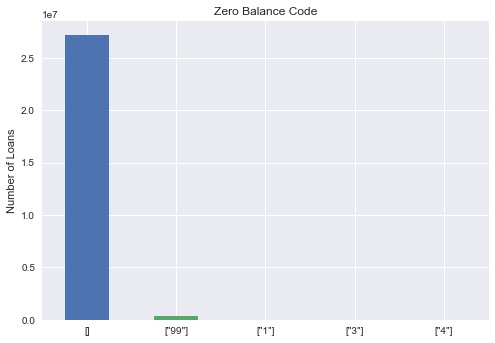

Top  -1  counts:  
 []        27172911
["99"]      393842
["1"]         2335
["3"]          578
Name: zerobalancecode, dtype: int64


In [175]:
draw(df.zerobalancecode, title='Zero Balance Code', ylabel='Number of Loans', sort = True)

# Create feature column for zero balance code

In [176]:
def map_zerobalancecode(*args):
    columns = [col for col in args]
    for column in columns:
        if column == code:
            return 1
        else:
            return 0
codes = pd.value_counts(df.zerobalancecode).index.tolist()

for code in codes:
        df['zerobalance_code{}'.format(code)] = list(map(map_zerobalancecode, df.zerobalancecode))


In [177]:
df.shape

(27570009, 108)

In [178]:
df.drop(['zerobalancecode'], axis=1, inplace=True)
df.shape

(27570009, 107)

In [179]:
# df.set_index('originationdate')
# df.sort_values(by='originationdate', ascending=True)

# Add S&P Experian default index and historical data

In [180]:
df=df.set_index('reportingperiodendingdate')
#df.head()
#df.to_csv('c:users/ugy1/abs/datasets/df.csv')

In [181]:
df1=pd.read_csv(path+'datasets/s&pExperianAutoDefaultIndex.csv', index_col=0)
df=df.join(df1)
df2=pd.read_csv(path+'datasets/experianHistDefaultRates.csv', index_col=0)
df=df.join(df2)

In [182]:
df.head()

,cik,assetnumber,reportingperiodbeginningdate,originationdate,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,obligorcreditscore,paymenttoincomepercentage,...,"zerobalance_code[""99""]","zerobalance_code[""1""]","zerobalance_code[""3""]","zerobalance_code[""4""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex
2016-12-31,1694276,3312469,2016-12-01,2016-10-31,19339.41,60.0,5.39,0.0,710,0.0682,...,0,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92
2016-12-31,1694276,3364684,2016-12-01,2016-10-31,17955.27,60.0,8.99,1.0,654,0.0792,...,0,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92
2016-12-31,1694276,3364692,2016-12-01,2016-10-31,14815.00,72.0,9.55,0.0,707,0.0372,...,0,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92
2016-12-31,1694276,3364718,2016-12-01,2016-10-31,13186.31,60.0,9.90,1.0,622,0.0488,...,0,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92
2016-12-31,1694276,3364734,2016-12-01,2016-10-31,16400.00,48.0,10.90,0.0,656,0.0829,...,0,0,0,0,0.0106,1.06,3.21,0.72,0.48,0.92


In [183]:
#df=df.drop(['reportingperiodbeginningdate','originationdate"], axis=1)
df.drop(['reportingperiodbeginningdate','originationdate'], axis=1, inplace=True)
df.shape
        

(27570009, 110)

# Clean data

In [184]:
# change columns to lower case and remove prefix to enable pandas to work
#column_list=[x.lower() for x in (column_list)]
#df.columns=df.columns.str.replace('abs_loan.','')
# convert objects to numeric
#df=df.convert_objects(convert_numeric=True)

# Check for null

In [185]:
df.isnull().values.any()

True

# Loan Statistics

In [186]:
df.describe()

,cik,originalloanamount,originalloanterm,originalinterestratepercentage,graceperiodnumber,paymenttoincomepercentage,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,reportingperiodinterestratepercentage,nextinterestratepercentage,...,"zerobalance_code[""99""]","zerobalance_code[""1""]","zerobalance_code[""3""]","zerobalance_code[""4""]",S&P/Experian Auto Default Index,AutoIndex,BankCardIndex,FirstMortgageIndex,SecondMortgageIndex,CompositeIndex
count,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07,2.731061e+07,2.754101e+07,2.752509e+07,2.756134e+07,2.756922e+07,...,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07,2.757001e+07
mean,1.716196e+06,2.404005e+04,6.708438e+01,1.242969e-01,1.476257e+00,7.436702e-01,1.755886e+04,4.770881e+02,1.723433e-01,1.723293e-01,...,1.428516e-02,8.469348e-05,2.096481e-05,1.244106e-05,9.683667e-03,9.850605e-01,3.651863e+00,6.668355e-01,6.496951e-01,8.957784e-01
std,3.236515e+04,1.076309e+04,8.423612e+00,5.494013e-01,5.458467e-01,3.230540e+01,1.004398e+04,4.445975e+02,8.677169e-01,8.675934e-01,...,1.186638e-01,9.202516e-03,4.578687e-03,3.527166e-03,5.682560e-04,6.115433e-02,2.058047e-01,3.180999e-02,1.809403e-01,3.657023e-02
min,1.129987e+06,5.510000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.537913e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.900000e-03,8.900000e-01,3.140000e+00,6.300000e-01,4.800000e-01,8.200000e-01
25%,1.705710e+06,1.653950e+04,6.100000e+01,1.900000e-02,1.000000e+00,4.770000e-02,1.081721e+04,2.563900e+02,1.900000e-02,1.900000e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.300000e-03,9.300000e-01,3.520000e+00,6.300000e-01,5.700000e-01,8.600000e-01
50%,1.718100e+06,2.222240e+04,7.200000e+01,4.860000e-02,1.000000e+00,7.820000e-02,1.617465e+04,3.988200e+02,4.890000e-02,4.890000e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.700000e-03,9.700000e-01,3.710000e+00,6.600000e-01,5.900000e-01,8.900000e-01
75%,1.728028e+06,2.940688e+04,7.300000e+01,1.133000e-01,2.000000e+00,1.230602e-01,2.265181e+04,5.912600e+02,1.145000e-01,1.145000e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.900000e-03,9.900000e-01,3.840000e+00,6.800000e-01,5.900000e-01,9.200000e-01
max,1.754784e+06,2.432811e+05,8.600000e+01,2.299000e+01,5.000000e+00,8.121600e+04,2.128795e+05,2.050125e+04,2.400000e+01,2.400000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e-02,1.110000e+00,3.860000e+00,7.500000e-01,1.220000e+00,9.600000e-01


# Current Vs Other Buckets

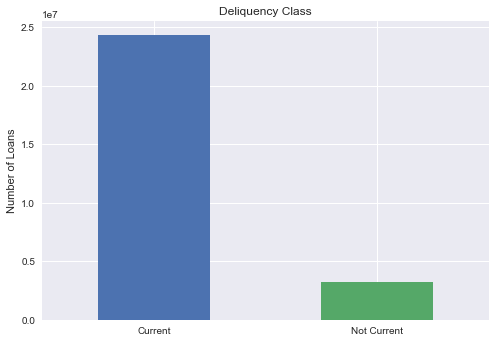

Number of loans Current : 24347180     Number of loans Not Current : 3222829


In [187]:
LABELS = ('Current', 'Not Current')
count_classes = pd.value_counts(df.currentdelinquencystatus>0, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Not Current :', count_classes[1],)

In [188]:
pd.value_counts(df.currentdelinquencystatus)

 0.0      24334792
 3.0        174847
 2.0        165015
 5.0        160650
 4.0        144217
 6.0        127463
 7.0        113887
 10.0       107775
 1.0        105751
 8.0        105058
 15.0       104599
 9.0         95502
 16.0        87360
 11.0        85567
 13.0        80316
 14.0        77284
 12.0        77261
 17.0        69965
 18.0        61429
 20.0        55992
 19.0        55222
 30.0        50147
 21.0        47722
 22.0        42249
 25.0        39427
 23.0        38533
 24.0        36657
 26.0        36563
 27.0        34536
 35.0        34035
            ...   
 291.0           1
 321.0           1
 342.0           1
 279.0           1
 185.0           1
 250.0           1
 211.0           1
 378.0           1
 311.0           1
 152.0           1
 177.0           1
 183.0           1
 187.0           1
 190.0           1
 200.0           1
 202.0           1
 210.0           1
 212.0           1
 242.0           1
 218.0           1
 223.0           1
 224.0      

In [189]:
df.currentdelinquencystatus.describe()

count    2.755762e+07
mean     2.520686e+00
std      1.014280e+01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.780000e+02
Name: currentdelinquencystatus, dtype: float64

In [190]:
u=pd.value_counts(df.currentdelinquencystatus==''.index) 
if len(u)<2:
    print('No blank current delinquency status')
else: 
    print('Number of loans with blank current delinquency status',':', u[1])
    #print('Dropping ', u[1], 'rows and retaining loans with correct interest paid throughdate')
    #df=df[df.interestpaidthroughdate>'1900-01-01']
df.shape

No blank current delinquency status


(27570009, 110)

# Label Creation

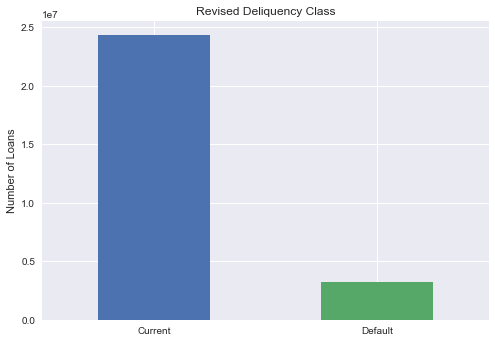

Number of loans Current : 24334792     Number of loans Defaulted : 3222829


In [191]:
def map_label(*args):
    columns = [col for col in args]
    for column in columns:
        if column > 0:
            return 1
        elif column == 0:
            return 0
        
df['label'] = list(map(map_label, df.currentdelinquencystatus ))

LABELS = ('Current', 'Default')
count_classes = pd.value_counts(df.label, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title('Revised Deliquency Class')
plt.ylabel("Number of Loans")
plt.show()
print('Number of loans Current :', count_classes[0],'   ', 'Number of loans Defaulted :', count_classes[1],)

# Loan Balance Amount at the End of Reporting Period

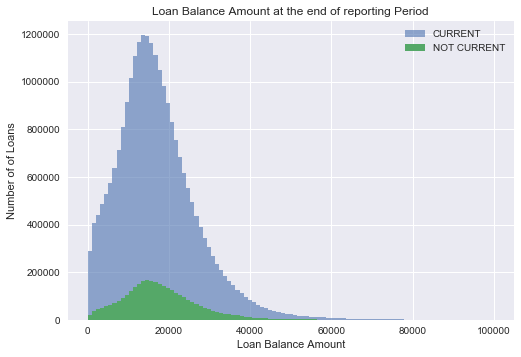

In [ ]:
current_df = df[df.label==0]
not_current_df = df[df.label==1]
bins = np.linspace(0, 100000, 100)
plt.hist(current_df.reportingperiodactualendbalanceamount, bins, alpha=0.6, 
         #density=True, 
         label='CURRENT')
plt.hist(not_current_df.reportingperiodactualendbalanceamount, bins, alpha=1, 
         #density=True, 
         label='NOT CURRENT')
plt.legend(loc='upper right')
plt.title("Loan Balance Amount at the end of reporting Period")
plt.xlabel('Loan Balance Amount')
plt.ylabel('Number of of Loans')
plt.show()

# Manual oversampling of default data 

In [ ]:
#def manual_oversampling(df):
default=df[df.label==1]
print('default: ',default.shape)
b=int((df.shape[0]-default.shape[0])/(default.shape[0]))
print('copy default data ',b, ' times')
b=int(b*manualOversamplingFactor)
print(b)
for i in range(b):
    df=df.append(default, ignore_index=True)
df=df.sample(frac=1).reset_index(drop=True)
draw(df.label, title='Manual Oversampling -Current Vs Non-Current', ylabel='Number of Loans', sort=True)
print(df.shape)
print(pd.value_counts(df.label==1))
#return df
   

default:  (3222829, 111)
copy default data  7  times
0


In [ ]:
#manual_oversampling(df)
print(pd.value_counts(df.label==1))
df.shape

# Oversampling with SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# x_train, y_train = SMOTE().fit_resample(x_train, y_train)

In [ ]:
# #Apply SMOTE to create synthetic observations from minority class
# #Source:https://github.com/scikit-learn-contrib/imbalanced-learn
# from imblearn.over_sampling import SMOTE #Over sampling
# sm = SMOTE(ratio='auto',kind='regular')
# X_sampled,y_sampled = sm.fit_sample(X,y.values.ravel())

# #Percentage of fraudlent records in original data
# Source_data_no_fraud_count = len(data[data.Class==0])
# Source_data_fraud_count = len(data[data.Class==1])
# print('Percentage of fraud counts in original dataset:{}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

# #Percentage of fraudlent records in sampled data
# Sampled_data_no_fraud_count = len(y_sampled[y_sampled==0])
# Sampled_data_fraud_count = len(y_sampled[y_sampled==1])
# print('Percentage of fraud counts in the new data:{}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

# Naive Random Oversampling

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X, y)
# from collections import Counter
# print(sorted(Counter(y_resampled).items()))

#  Clean up for Machine Learning

In [ ]:
#df.fillna(0, inplace=True)
df=df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)
df.head()

# Preparing data for Machine Learning

In [ ]:
# prepare label
Y=df.label.values
Y.shape

In [ ]:
# reshape labels for machine learning
Y=Y.reshape(Y.shape[0],1)
Y.shape

In [ ]:
# prepare input data
input=df.values
input.shape

In [ ]:
# calculate train/test split
len_train = int(len(input)*train_split)
print(len_train)

In [ ]:
# apply train/test split to labels
y_train = Y[0:len_train]
y_test = Y[len_train:]

In [ ]:
#drop unneeded columns for creating input data
df.drop(['currentdelinquencystatus','label'], axis=1, inplace=True)

In [ ]:
#reshape input data for machine learning
input=input.reshape(input.shape[0], input.shape[1], 1)
input.shape

In [ ]:
# apply train/test split to input data
x_train = input[0:len_train]
x_test = input[len_train:]

# Normalize input data

In [ ]:
x_train_keras_scaled = keras.utils.normalize(x_train, axis=-1, order=2)
x_test_keras_scaled = keras.utils.normalize(x_test, axis=-1, order=2)
x_train_keras_scaled.shape

# Model Architecture

In [ ]:
model = keras.Sequential()
model.add(keras.layers.GRU(128, activation='relu',  kernel_regularizer=regularizers.l2(0.01), input_shape=(x_train_keras_scaled.shape[1:]), return_sequences=True))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.GRU(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(2, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(lr=1e-3, decay=1e-6)
model.summary()

# Model Configuration

In [ ]:
#save the best model
#keras.callbacks.Callback()
# checkPoint = ModelCheckpoint(filepath = path+'model/'+name+'.h5',
#                             save_best_only = True,
#                             verbose=0)
# tensorboard = TensorBoard(log_dir=path+'logs/{}'.format(name),
#                           histogram_freq=0,
#                           batch_size=32,
#                           write_graph=True,
#                           write_images=False)
# history = keras.callbacks.History()

# Train the Model

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test_keras_scaled, y_test), batch_size=8, 
        # callbacks = [
   # baseLogger,
    #history,
    #tensorboard
    #learningRateScheduler,
    #reduceLROnPlateau
     #    ], 
          shuffle=False
)


# Save the Model

In [ ]:
model.save(path+'model/'+name+'.h5')

In [ ]:
test_loss, test_acc = model.evaluate(x_test_keras_scaled, y_test)
print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

In [ ]:
y_pred = model.predict_classes(x_test)

In [ ]:
#print(y_pred)

In [ ]:
len(y_pred)

In [ ]:
np.count_nonzero(y_pred)

In [ ]:
np.count_nonzero(y_test)

# Load Saved Model

In [ ]:
#saved_model = load_model(path+'model/ABS_Keras-GRU254GRU128D32D2-adam1540234475.h5')

In [ ]:
# test_loss, test_acc = saved_model.evaluate(x_test_keras_scaled, y_test)
# print('Test Loss : ',test_loss,' ','Test Accuracy : ', test_acc)

# Predict Classes

In [ ]:
y_pred = model.predict_classes(x_test)

# Confusion Matrix

In [ ]:
import itertools
class_names = ['Current', 'Non-Current']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

In [ ]:
#1. find any string which has no numbers 


'

#2. find only numbers r'^([0-9]*)$'

#3. find only blanks(empty strings) r'^(\s+)$'